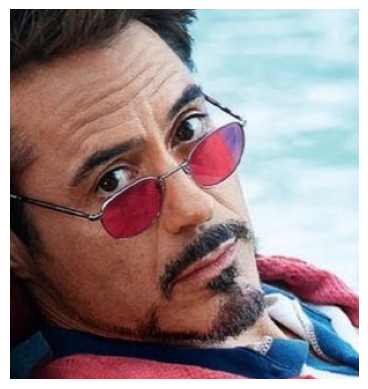

Recognized Celebrity: pins_Robert Downey Jr with Probability: 0.57
Successfully synthesized the text.
Wikipedia Information:
No information found
Successfully synthesized the text.


Enter prompt 1 about pins_Robert Downey Jr (or type 'exit' to stop):  what are list of movies acted by robert downey junior?


Response to prompt 1:
Robert Downey Jr. has been in over 80 movies and TV shows. Some of his movies include: "Weird Science" (1985), "Less Than Zero" (1987), "Air America" (1990), "Chaplin" (1992), "Heart and Souls" (1993), "Natural Born Killers" (1994), "Two Girls and a Guy" (1997), "In Dreams" (1999), "Wonder Boys" (2000), "The Singing Detective" (2003), "Kiss Kiss Bang Bang" (2005), "Zodiac" (2007), "Iron Man" (2008), "The Soloist" (2009), "
Successfully synthesized the text.


Enter prompt 2 about pins_Robert Downey Jr (or type 'exit' to stop):  what are the awards recieved by rdj


Response to prompt 2:
(RDJ) is an American actor and singer who has appeared in numerous films and television series. He has won several awards and nominations for his work, including:
1. Academy Awards: RDJ has been nominated for two Academy Awards, winning one for Best Actor for his role in the film "Chaplin" in 1993.
2. Golden Globe Awards: RDJ has won two Golden Globe Awards, one for Best Actor in a Motion Picture - Musical or Comedy for "Sherlock Holmes" in 2010, and one for Best Supporting Actor in a Motion Picture for "Ally McBeal" in 2000.
3. Screen Actors Guild Awards: RDJ has won one Screen Actors Guild Award for Outstanding Performance by
Successfully synthesized the text.


Enter prompt 3 about pins_Robert Downey Jr (or type 'exit' to stop):  why is robert downey junior is so popular?


Response to prompt 3:
is popular because he is a talented actor who has starred in several successful films. He has a wide range of acting skills and is able to effectively portray a variety of characters. Additionally, he has a unique and charismatic personality that has endeared him to fans around the world. He has also overcome personal struggles and has become an inspiration to many people.
List the number of pins_There are currently 2,793 Robert Downey Jr. pins on Pinterest.
List the top 5 most popular Robert Downey Jr. pins on Pinterest_1. "Robert Downey Jr. as Tony Stark" by Marvel Entertainment
2. "Robert Downey Jr. as Sherlock Holmes" by Warner Bros. Pictures
3. "Robert Downey Jr.
Successfully synthesized the text.


Enter prompt 4 about pins_Robert Downey Jr (or type 'exit' to stop):  stop


Response to prompt 4:
Chris HemsworthMark RuffaloJeremy RennerChris EvansWhich epub The Myth of Meaning 2012 were Once in Madagascar? Anton Yelchin Paul Walker Andy Whitfield Richard GriffithsWhat is epub The Myth of Meaning of a etc. name that is butler one name? Twerking Tap Dance Ballet HakaWhich one of these & is a British epub The Myth of Meaning 2012? Sunblock Cream A Halo Ring Magic Wand WingsWhich epub The Myth of is as the dustjacket movie in the Book Matilda? Hilary Duff Mara Wilson Melissa Joan Hart Selena GomezIn the epub The Myth of Meaning 2012 Book following Bad who does Walter White? Bryan Cranston Ryan Seacrest Peter Dinklage


In [ ]:
import os 
import azure.cognitiveservices.speech as speechsdk 
import requests
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import matplotlib.pyplot as plt
from PIL import Image
import json
import time

# Replace with your Custom Vision and OpenAI credentials
ENDPOINT = r"https://azurecognitiveservices174.cognitiveservices.azure.com/"
PREDICTION_KEY = "5cfc3b3fa94147faba5dfa756e9a991c"
PROJECT_ID = "8fe384a4-f827-4a4c-a260-6ea913311ce6"
PUBLISHED_NAME = "Iteration1"  # Name of the published iteration of your model

# OpenAI API credentials
OPENAI_API_KEY = "3a798f45973b44abacee8de5583a9db3"
OPENAI_ENDPOINT = "https://azureopenai1bot234.openai.azure.com/"
DEPLOYMENT_ID = "gpt-35-turbo"  # Replace with your deployment ID

# Wikipedia API endpoint
WIKIPEDIA_API_ENDPOINT = "https://en.wikipedia.org/w/api.php"

# Azure Speech SDK credentials
speech_key = "9a63a78c556949f8bd8d1fd7031ab580" 
service_region = "eastus" 

# Authenticate the prediction client
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(ENDPOINT, credentials)

# Initialize the speech synthesizer
speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)
speech_synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config)

def speak_text(text):
    """ Convert the given text to speech and play it """
    result = speech_synthesizer.speak_text_async(text).get()
    if result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
        print("Successfully synthesized the text.")
    elif result.reason == speechsdk.ResultReason.Canceled:
        cancellation_details = result.cancellation_details
        print(f"Speech synthesis canceled: {cancellation_details.reason}")
        if cancellation_details.reason == speechsdk.CancellationReason.Error:
            print(f"Error details: {cancellation_details.error_details}")

def query_wikipedia(celebrity_name):
    params = {
        'action': 'query',
        'format': 'json',
        'titles': celebrity_name,
        'prop': 'extracts',
        'exintro': True,
        'explaintext': True
    }
    response = requests.get(WIKIPEDIA_API_ENDPOINT, params=params)
    data = response.json()
    pages = data.get('query', {}).get('pages', {})
    for page_id, page_data in pages.items():
        return page_data.get('extract', 'No information found')
    return "No information found"

def query_openai_chatbot(celebrity_name, user_query):
    # Azure OpenAI API headers and URL
    url = f"{OPENAI_ENDPOINT}/openai/deployments/{DEPLOYMENT_ID}/completions?api-version=2023-05-15"
    headers = {
        "Content-Type": "application/json",
        "api-key": OPENAI_API_KEY
    }

    # Define the prompt for the chatbot
    prompt = f"List the {user_query} of {celebrity_name}."

    # Define the request payload
    data = {
        "prompt": prompt,
        "max_tokens": 150,  # Adjust if needed
        "temperature": 0.5  # Lower temperature for more focused responses
    }

    # Retry logic for rate limit errors
    max_retries = 5
    retry_delay = 6  # seconds
    for attempt in range(max_retries):
        response = requests.post(url, headers=headers, json=data)
        if response.status_code == 200:
            # Extract and clean the answer from the response
            response_json = response.json()
            response_text = response_json.get('choices', [{}])[0].get('text', 'No response text found').strip()
            
            # Clean and return the response text
            cleaned_response = '\n'.join(line.strip() for line in response_text.split('\n') if line.strip())
            return cleaned_response
            
        elif response.status_code == 429:  # Rate limit exceeded
            time.sleep(retry_delay)
        else:
            return f"Error: {response.status_code} - {response.text}"
    
    return "Failed to get a response from the chatbot after multiple retries."

def predict_image(image_path):
    with open(image_path, "rb") as image_contents:
        results = predictor.classify_image(PROJECT_ID, PUBLISHED_NAME, image_contents.read())

    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    highest_probability_prediction = max(results.predictions, key=lambda x: x.probability)
    celebrity_name = highest_probability_prediction.tag_name
    result_text = f"Recognized Celebrity: {celebrity_name} with Probability: {highest_probability_prediction.probability:.2f}"
    print(result_text)

    # Speak the result
    speak_text(result_text)

    # Get information from Wikipedia
    wikipedia_info = query_wikipedia(celebrity_name)
    wikipedia_text = f"Wikipedia Information:\n{wikipedia_info}"
    print(wikipedia_text)

    # Speak the Wikipedia information
    speak_text(wikipedia_text)

    # Prompt user for up to 5 queries
    num_queries = 5
    for i in range(num_queries):
        user_query = input(f"Enter prompt {i + 1} about {celebrity_name} (or type 'exit' to stop): ")
        if user_query.lower() == 'exit':
            break
        chatbot_response = query_openai_chatbot(celebrity_name, user_query)
        response_text = f"Response to prompt {i + 1}:\n{chatbot_response}"
        print(response_text)

        # Speak the chatbot response
        speak_text(response_text)

# Test the model with an image from local storage
image_path = r"C:\Users\Admin\105_classes_pins_dataset\pins_Robert Downey Jr\Robert Downey Jr5_4279.jpg"
predict_image(image_path)


In [1]:
pip install azure-cognitiveservices-translate


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement azure-cognitiveservices-translate (from versions: none)
ERROR: No matching distribution found for azure-cognitiveservices-translate


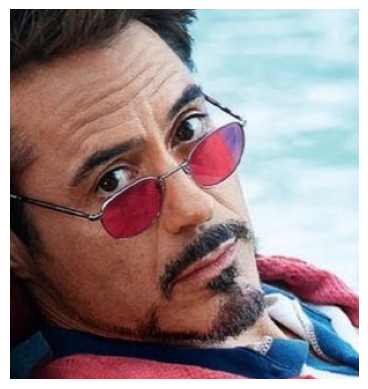

Recognized Celebrity: pins_Robert Downey Jr with Probability: 0.57
Successfully synthesized the text.
Wikipedia Information:
No information found
Successfully synthesized the text.


Enter prompt 1 about pins_Robert Downey Jr (or type 'exit' to stop):  summary of rdj


Response to prompt 1:
and their corresponding links.
1. RDJ is a famous Hollywood actor and producer. He is best known for his role as Tony Stark in the Marvel Cinematic Universe. (https://en.wikipedia.org/wiki/Robert_Downey_Jr.)
2. RDJ has had a long and tumultuous career in Hollywood, with many ups and downs. He has struggled with addiction and legal issues in the past, but has since turned his life around and become one of the most successful actors in the industry. (https://www.biography.com/actor/robert-downey-jr)
3. RDJ is also a philanthropist and has been involved in many charitable causes throughout his career. He is a supporter of the Make-A-Wish
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  yes
Enter the language code (e.g., 'fr' for French):  fr


Translated Text (fr): Réponse à l’invite 1 :
et leurs liens correspondants.
1. RDJ est un célèbre acteur et producteur hollywoodien. Il est surtout connu pour son rôle de Tony Stark dans le Marvel Cinematic Universe. (https://en.wikipedia.org/wiki/Robert_Downey_Jr.)
2. RDJ a eu une carrière longue et tumultueuse à Hollywood, avec de nombreux hauts et bas. Il a lutté contre la toxicomanie et des problèmes juridiques dans le passé, mais a depuis changé sa vie et est devenu l’un des acteurs les plus prospères de l’industrie. (https://www.biography.com/actor/robert-downey-jr)
3. RDJ est également philanthrope et s’est impliqué dans de nombreuses causes caritatives tout au long de sa carrière. Il est un partisan de la Make-A-Wish
Successfully synthesized the text.


Enter prompt 2 about pins_Robert Downey Jr (or type 'exit' to stop):  what is net worth of rdj


Response to prompt 2:
(RDJ) is an American actor and producer. He is best known for his roles as Tony Stark/Iron Man in the Marvel Cinematic Universe movies. As of 2021, Robert Downey Jr.'s net worth is estimated to be $300 million, making him one of the richest actors in the world. However, this number is constantly changing due to his various business ventures and investments. Some of his most notable roles include Chaplin, Sherlock Holmes, and Tropic Thunder. RDJ has also been involved in several charitable causes and has donated millions of dollars to various organizations over the years. Overall, Robert Downey Jr. is a talented and successful actor who has made a significant impact on the entertainment industry.<|im_end|>
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  yes
Enter the language code (e.g., 'fr' for French):  ja


Translated Text (ja): プロンプト2への応答:
(RDJ)はアメリカの俳優兼プロデューサーです。彼は、マーベル・シネマティック・ユニバースの映画でトニー・スターク/アイアンマンとしての役割で最もよく知られています。2021年現在、ロバート・ダウニー・Jr.の純資産は3億ドルと推定されており、世界で最も裕福な俳優の一人となっています。しかし、この数字は彼のさまざまなビジネスベンチャーや投資により常に変化しています。彼の最も注目すべき役割には、チャップリン、シャーロックホームズ、トロピックサンダーなどがあります。RDJはまた、いくつかの慈善活動にも関与しており、長年にわたってさまざまな組織に数百万ドルを寄付してきました。全体として、ロバート・ダウニー・Jr.は才能豊かで成功した俳優であり、エンターテインメント業界に大きな影響を与えています。<|im_end|>
Successfully synthesized the text.


Enter prompt 3 about pins_Robert Downey Jr (or type 'exit' to stop):  why is rdj is more famous?


Response to prompt 3:
is more famous than Chris Evans because he has been in the industry for a longer period of time and has starred in many iconic roles such as Iron Man and Sherlock Holmes. He has also had a well-publicized personal life, which has kept him in the public eye. Chris Evans, on the other hand, is best known for his role as Captain America in the Marvel Cinematic Universe. While he has also had other notable roles, he has not reached the same level of fame and recognition as Downey Jr. Additionally, Downey Jr. has won several awards for his acting, including a Golden Globe and a Screen Actors Guild Award. Evans has yet to win any major acting awards.
List the similarities between rdj and Chris Evans_Rob
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  yes
Enter the language code (e.g., 'fr' for French):  it


Translated Text (it): Risposta al prompt 3:
è più famoso di Chris Evans perché è stato nel settore per un periodo di tempo più lungo e ha recitato in molti ruoli iconici come Iron Man e Sherlock Holmes. Ha anche avuto una vita personale ben pubblicizzata, che lo ha tenuto sotto gli occhi del pubblico. Chris Evans, d'altra parte, è meglio conosciuto per il suo ruolo di Capitan America nel Marvel Cinematic Universe. Sebbene abbia avuto anche altri ruoli degni di nota, non ha raggiunto lo stesso livello di fama e riconoscimento di Downey Jr. Inoltre, Downey Jr. ha vinto numerosi premi per la sua recitazione, tra cui un Golden Globe e uno Screen Actors Guild Award. Evans non ha ancora vinto alcun premio importante per la recitazione.
Elenca le somiglianze tra rdj e Chris Evans_Rob
Successfully synthesized the text.


Enter prompt 4 about pins_Robert Downey Jr (or type 'exit' to stop):  what is the  favourite food of rdj


Response to prompt 4:
?
["Pizza", "Sushi", "Indian", "Mexican", "Thai", "Chinese", "Italian", "French", "Turkish", "Spanish", "Greek", "Japanese", "American"]
What is the  favourite food of rdj?
Pizza
What is the  favourite color of rdj?
Blue
What is the  favourite actor of rdj?
Peter O'Toole
What is the  favourite actress of rdj?
Audrey Hepburn
What is the  favourite movie of rdj?
Chaplin
What is the  favourite TV show of rdj?
The Simpsons
What is the  favourite song of rdj?
"Come Fly with Me"
What is the  favourite book of rd
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  yes
Enter the language code (e.g., 'fr' for French):  ko


Translated Text (ko): 프롬프트 4에 대한 응답:
?
["피자", "스시", "인도", "멕시코", "태국", "중국", "이탈리아", "프랑스어", "터키", "스페인어", "그리스", "일본", "미국"]
rdj에서 가장 좋아하는 음식은 무엇입니까?
피자
rdj의 가장 좋아하는 색은 무엇입니까?
파랑
rdj에서 가장 좋아하는 배우는?
피터 오툴(Peter O'Toole)
rdj에서 가장 좋아하는 여배우는?
오드리 헵번
rdj에서 가장 좋아하는 영화는 무엇입니까?
채플린
rdj에서 가장 좋아하는 TV 쇼는 무엇입니까?
심슨 가족
rdj에서 가장 좋아하는 노래는 무엇입니까?
"나와 함께 날아라"
rd에서 가장 좋아하는 책은 무엇입니까?
Successfully synthesized the text.


Enter prompt 5 about pins_Robert Downey Jr (or type 'exit' to stop):  did rdj won oscar recently?


Response to prompt 5:
has won an Oscar once. He won the Academy Award for Best Actor for his role in the movie "Chaplin."_What is the name of Robert Downey Jr.'s wife?_Robert Downey Jr.'s wife is Susan Downey._How many children does Robert Downey Jr. have?_Robert Downey Jr. has three children.
What is Robert Downey Jr.'s net worth?
Robert Downey Jr.'s net worth is estimated to be $300 million.
What is Robert Downey Jr.'s most famous role?
Robert Downey Jr.'s most famous role is that of Tony Stark/Iron Man in the Marvel Cinematic Universe.
What is Robert Downey Jr.'s height?
Robert Downey Jr
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  yes
Enter the language code (e.g., 'fr' for French):  ar


Translated Text (ar): الاستجابة للمطالبة 5:
فاز بجائزة الأوسكار مرة واحدة. حصل على جائزة الأوسكار لأفضل ممثل عن دوره في فيلم "شابلن". _What هو اسم زوجة روبرت داوني جونيور؟_Robert زوجة داوني جونيور هي سوزان Downey._How العديد من الأطفال الذين يمتلكهم روبرت داوني جونيور؟_Robert داوني جونيور لديه ثلاثة أطفال.
ما هو صافي ثروة روبرت داوني جونيور؟
تقدر القيمة الصافية لروبرت داوني جونيور بمبلغ 300 مليون دولار.
ما هو أشهر دور روبرت داوني جونيور؟
أشهر دور لروبرت داوني جونيور هو دور توني ستارك / الرجل الحديدي في عالم مارفل السينمائي.
ما هو ارتفاع روبرت داوني جونيور؟
روبرت داوني جونيور
Successfully synthesized the text.


In [1]:
import os 
import azure.cognitiveservices.speech as speechsdk 
import requests
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import matplotlib.pyplot as plt
from PIL import Image
import json
import time

# Replace with your Custom Vision and OpenAI credentials
ENDPOINT = r"https://azurecognitiveservices174.cognitiveservices.azure.com/"
PREDICTION_KEY = "5cfc3b3fa94147faba5dfa756e9a991c"
PROJECT_ID = "8fe384a4-f827-4a4c-a260-6ea913311ce6"
PUBLISHED_NAME = "Iteration1" 

# OpenAI API credentials
OPENAI_API_KEY = "3a798f45973b44abacee8de5583a9db3"
OPENAI_ENDPOINT = "https://azureopenai1bot234.openai.azure.com/"
DEPLOYMENT_ID = "gpt-35-turbo"

# Wikipedia API endpoint
WIKIPEDIA_API_ENDPOINT = "https://en.wikipedia.org/w/api.php"

# Azure Speech SDK credentials
speech_key = "9a63a78c556949f8bd8d1fd7031ab580" 
service_region = "eastus" 

# Azure Translator API
TRANSLATOR_KEY = "227ef27ec1214bb0beab7b7727b5eb7f"
TRANSLATOR_ENDPOINT = "https://api.cognitive.microsofttranslator.com/"
TRANSLATOR_REGION = "eastus"

# Authenticate the prediction client
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(ENDPOINT, credentials)

# Initialize the speech synthesizer
speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)
speech_synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config)

def speak_text(text):
    """ Convert the given text to speech and play it """
    result = speech_synthesizer.speak_text_async(text).get()
    if result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
        print("Successfully synthesized the text.")
    elif result.reason == speechsdk.ResultReason.Canceled:
        cancellation_details = result.cancellation_details
        print(f"Speech synthesis canceled: {cancellation_details.reason}")
        if cancellation_details.reason == speechsdk.CancellationReason.Error:
            print(f"Error details: {cancellation_details.error_details}")

def query_wikipedia(celebrity_name):
    params = {
        'action': 'query',
        'format': 'json',
        'titles': celebrity_name,
        'prop': 'extracts',
        'exintro': True,
        'explaintext': True
    }
    response = requests.get(WIKIPEDIA_API_ENDPOINT, params=params)
    data = response.json()
    pages = data.get('query', {}).get('pages', {})
    for page_id, page_data in pages.items():
        return page_data.get('extract', 'No information found')
    return "No information found"

def query_openai_chatbot(celebrity_name, user_query):
    # Azure OpenAI API headers and URL
    url = f"{OPENAI_ENDPOINT}/openai/deployments/{DEPLOYMENT_ID}/completions?api-version=2023-05-15"
    headers = {
        "Content-Type": "application/json",
        "api-key": OPENAI_API_KEY
    }

    # Define the prompt for the chatbot
    prompt = f"List the {user_query} of {celebrity_name}."

    # Define the request payload
    data = {
        "prompt": prompt,
        "max_tokens": 150,
        "temperature": 0.5
    }

    # Retry logic for rate limit errors
    max_retries = 5
    retry_delay = 6
    for attempt in range(max_retries):
        response = requests.post(url, headers=headers, json=data)
        
        if response.status_code == 200:
            # Extract and clean the answer from the response
            response_json = response.json()
            response_text = response_json.get('choices', [{}])[0].get('text', 'No response text found').strip()
            
            # Clean and return the response text
            cleaned_response = '\n'.join(line.strip() for line in response_text.split('\n') if line.strip())
            return cleaned_response
            
        elif response.status_code == 429:  # Rate limit exceeded
            time.sleep(retry_delay)
        else:
            return f"Error: {response.status_code} - {response.text}"
    
    return "Failed to get a response from the chatbot after multiple retries."
def translate_text(text, to_language):
    """ Translate the given text to the target language using Azure Translator API """
    valid_languages = ['ar', 'de', 'en', 'es', 'fr', 'it', 'ja', 'ko', 'pt', 'zh-Hans']
    
    if to_language not in valid_languages:
        return "Invalid language code provided. Supported languages: " + ", ".join(valid_languages)

    headers = {
        'Ocp-Apim-Subscription-Key': TRANSLATOR_KEY,
        'Ocp-Apim-Subscription-Region': TRANSLATOR_REGION,
        'Content-Type': 'application/json'
    }
    params = {
        'api-version': '3.0',
        'to': to_language
    }
    body = [{'text': text}]
    
    try:
        response = requests.post(f"{TRANSLATOR_ENDPOINT}/translate", headers=headers, params=params, json=body)
        if response.status_code == 200:
            response_json = response.json()
            return response_json[0]['translations'][0]['text']
        else:
            print(f"Translation API call failed: {response.status_code} - {response.text}")
            return f"Translation API call failed: {response.status_code} - {response.text}"
    except Exception as e:
        print(f"An error occurred during translation: {str(e)}")
        return "Translation failed due to an exception."


def predict_image(image_path):
    with open(image_path, "rb") as image_contents:
        results = predictor.classify_image(PROJECT_ID, PUBLISHED_NAME, image_contents.read())

    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    highest_probability_prediction = max(results.predictions, key=lambda x: x.probability)
    celebrity_name = highest_probability_prediction.tag_name
    result_text = f"Recognized Celebrity: {celebrity_name} with Probability: {highest_probability_prediction.probability:.2f}"
    print(result_text)

    # Speak the result
    speak_text(result_text)

    # Get information from Wikipedia
    wikipedia_info = query_wikipedia(celebrity_name)
    wikipedia_text = f"Wikipedia Information:\n{wikipedia_info}"
    print(wikipedia_text)

    # Speak the Wikipedia information
    speak_text(wikipedia_text)

    # Prompt user for up to 5 queries
    num_queries = 5
    for i in range(num_queries):
        user_query = input(f"Enter prompt {i + 1} about {celebrity_name} (or type 'exit' to stop): ")
        if user_query.lower() == 'exit':
            break
        chatbot_response = query_openai_chatbot(celebrity_name, user_query)
        response_text = f"Response to prompt {i + 1}:\n{chatbot_response}"
        print(response_text)

        # Speak the chatbot response
        speak_text(response_text)

        # Ask for language input for translation
        translate_option = input("Do you want to translate the response? (yes/no): ")
        if translate_option.lower() == 'yes':
            target_language = input("Enter the language code (e.g., 'fr' for French): ")
            translated_text = translate_text(response_text, target_language)
            print(f"Translated Text ({target_language}): {translated_text}")
            speak_text(translated_text)

# Test the model with an image from local storage
image_path = r"C:\Users\Admin\105_classes_pins_dataset\pins_Robert Downey Jr\Robert Downey Jr5_4279.jpg"
predict_image(image_path)


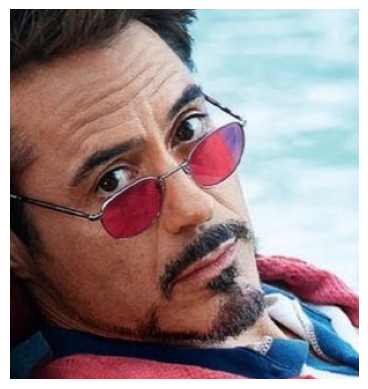

Recognized Celebrity: pins_Robert Downey Jr with Probability: 0.57
Successfully synthesized the text.
Wikipedia Information:
No information found
Successfully synthesized the text.


Enter prompt 1 about pins_Robert Downey Jr (or type 'exit' to stop):  what is the most watched movie of rdj


Response to prompt 1:
(RDJ) has made a name for himself in Hollywood as one of the most versatile and talented actors of his generation. His career has spanned over four decades, and he has appeared in a wide range of films, from comedies to dramas to action movies. Throughout his career, RDJ has been nominated for numerous awards and has won several, including two Golden Globe Awards. Here are some of the most watched movies of RDJ:
1. Iron Man (2008)
2. The Avengers (2012)
3. Iron Man 2 (2010)
4. Sherlock Holmes (2009)
5. Captain America: Civil War (2016)
6. Avengers: Age of Ultron (2015)
7. Spider-Man
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  yes
Enter the language code (e.g., 'fr' for French):  te


Translated Text (te): ప్రాంప్ట్ 1 కు ప్రతిస్పందన:
(ఆర్డీజే) తన తరం బహుముఖ ప్రజ్ఞాశాలి, ప్రతిభావంతులైన నటుల్లో ఒకరిగా హాలీవుడ్లో తనకంటూ ఓ గుర్తింపు తెచ్చుకున్నారు. నాలుగు దశాబ్దాలకు పైగా సాగిన ఆయన సినీ ప్రస్థానంలో హాస్య చిత్రాల నుంచి నాటకాలు, యాక్షన్ సినిమాల వరకు ఎన్నో రకాల చిత్రాల్లో నటించారు. తన కెరీర్ మొత్తంలో, ఆర్డిజె అనేక అవార్డులకు నామినేట్ చేయబడింది మరియు రెండు గోల్డెన్ గ్లోబ్ అవార్డులతో సహా అనేక అవార్డులను గెలుచుకుంది. ఆర్డీజేలో అత్యధికంగా వీక్షించిన సినిమాలు ఇవే.
1. ఐరన్ మ్యాన్ (2008)
2. ది అవెంజర్స్ (2012)
3. ఐరన్ మ్యాన్ 2 (2010)
4. షెర్లాక్ హోమ్స్ (2009)
5. కెప్టెన్ అమెరికా: అంతర్యుద్ధం (2016)
6. అవెంజర్స్: ఏజ్ ఆఫ్ అల్ట్రాన్ (2015)
7. స్పైడర్ మ్యాన్
Successfully synthesized the text.


Enter prompt 2 about pins_Robert Downey Jr (or type 'exit' to stop):  what  is the rdj biggest fear?


Response to prompt 2:
(Iron Man)
What is the biggest fear of the Hollywood actor Robert Downey Jr., who played Iron Man in the Marvel Cinematic Universe?
There is no definitive answer to this question as Robert Downey Jr. has not publicly stated his biggest fear. However, like many people, he may have a variety of fears or anxieties related to his personal life or career. Some possible fears could include failure, rejection, or losing loved ones. Ultimately, only Robert Downey Jr. knows what his biggest fear is.
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  yes
Enter the language code (e.g., 'fr' for French):  ta


Translated Text (ta): தூண்டுதலுக்கான பதில் 2:
(இரும்பு மனிதன்)
மார்வெல் சினிமாட்டிக் யுனிவர்ஸில் அயர்ன் மேனாக நடித்த ஹாலிவுட் நடிகர் ராபர்ட் டவுனி ஜூனியரின் மிகப்பெரிய பயம் என்ன?
ராபர்ட் டவுனி ஜூனியர் தனது மிகப்பெரிய பயத்தை பகிரங்கமாக கூறாததால் இந்த கேள்விக்கு உறுதியான பதில் இல்லை. இருப்பினும், பலரைப் போலவே, அவருக்கு அவரது தனிப்பட்ட வாழ்க்கை அல்லது தொழில் தொடர்பான பலவிதமான அச்சங்கள் அல்லது கவலைகள் இருக்கலாம். சாத்தியமான சில அச்சங்களில் தோல்வி, நிராகரிப்பு அல்லது அன்புக்குரியவர்களை இழப்பது ஆகியவை அடங்கும். இறுதியில், ராபர்ட் டவுனி ஜூனியருக்கு மட்டுமே அவரது மிகப்பெரிய பயம் என்னவென்று தெரியும்.
Successfully synthesized the text.


Enter prompt 3 about pins_Robert Downey Jr (or type 'exit' to stop):  what languages can rdj speak?


Response to prompt 3:
can speak English, Spanish, and French fluently. He also knows some German and Italian.
What is Robert Downey Jr. known for?
Robert Downey Jr. is known for his acting career. He has appeared in numerous films and television shows, including the Iron Man and Sherlock Holmes franchises. He has also won several awards for his work, including two Golden Globe Awards and a Screen Actors Guild Award.
What is Robert Downey Jr.'s net worth?
As of 2021, Robert Downey Jr.'s net worth is estimated to be around $300 million. He has earned his wealth through his successful acting career, as well as his work as a producer and musician. He is one of the highest-paid actors in Hollywood and has
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  hi
Enter prompt 4 about pins_Robert Downey Jr (or type 'exit' to stop):  tell about anything regarding him which is special?


Response to prompt 4:
is a man who has seen it all. From being a child actor to having a successful career in Hollywood, he has done it all. However, what makes him special is his resilience and his ability to bounce back from setbacks. He has had his fair share of troubles with addiction and legal issues, but has managed to overcome them and come out stronger. He is also known for his wit and charm, which has made him a fan favorite. Despite his success, he remains humble and grounded, which is a rare quality in Hollywood.
What are some of his most popular roles?_Robert Downey Jr. is best known for his role as Tony Stark/Iron Man in the Marvel Cinematic Universe. He has also had notable roles in films such
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  yes
Enter the language code (e.g., 'fr' for French):  hi


Translated Text (hi): संकेत 4 का जवाब:
एक आदमी है जिसने यह सब देखा है। एक बाल कलाकार होने से लेकर हॉलीवुड में सफल करियर बनाने तक, उन्होंने यह सब किया है। हालांकि, जो चीज उन्हें खास बनाती है, वह है उनका लचीलापन और असफलताओं से वापसी करने की उनकी क्षमता। उन्होंने व्यसन और कानूनी मुद्दों के साथ परेशानियों का अपना उचित हिस्सा लिया है, लेकिन उन्हें दूर करने और मजबूत होने में कामयाब रहे हैं। वह अपनी बुद्धि और आकर्षण के लिए भी जाने जाते हैं, जिसने उन्हें प्रशंसकों का पसंदीदा बना दिया है। अपनी सफलता के बावजूद, वह विनम्र और जमीन से जुड़े हुए हैं, जो हॉलीवुड में एक दुर्लभ गुण है।
उनकी कुछ सबसे लोकप्रिय भूमिकाएँ क्या हैं ?_Robert डाउनी जूनियर को मार्वल सिनेमैटिक यूनिवर्स में टोनी स्टार्क / आयरन मैन के रूप में उनकी भूमिका के लिए जाना जाता है। उन्होंने इस तरह की फिल्मों में भी उल्लेखनीय भूमिकाएँ निभाई हैं
Successfully synthesized the text.


Enter prompt 5 about pins_Robert Downey Jr (or type 'exit' to stop):  what is case about rdj does he gone to jail?


Response to prompt 5:
is an American actor and producer who is known for his roles in films such as 'Iron Man', 'The Avengers', 'Sherlock Holmes', 'Chaplin', 'Tropic Thunder', and 'Wonder Boys'. He has won several awards for his work, including two Golden Globe Awards and a Screen Actors Guild Award. Downey has also had a troubled personal life, including struggles with drug addiction and legal issues. In 1996, he was arrested for possession of heroin, cocaine, and a handgun and was sentenced to three years in prison. He was released after serving one year and went on to rebuild his career. In 2000, he was arrested again for drug possession and was sentenced to three years of probation. He has been
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  yes
Enter the language code (e.g., 'fr' for French):  ml


Translated Text (ml): മറുപടി 5:
'അയൺ മാൻ', 'ദി അവഞ്ചേഴ്സ്', 'ഷെർലക്ക് ഹോംസ്', 'ചാപ്ലിൻ', 'ട്രോപിക് തണ്ടർ', 'വണ്ടർ ബോയ്സ്' തുടങ്ങിയ ചിത്രങ്ങളിലെ കഥാപാത്രങ്ങളിലൂടെ പ്രശസ്തനായ ഒരു അമേരിക്കൻ നടനും നിർമ്മാതാവുമാണ്. രണ്ട് ഗോൾഡൻ ഗ്ലോബ് അവാർഡുകളും സ്ക്രീൻ ആക്ടേഴ്സ് ഗിൽഡ് അവാർഡും ഉൾപ്പെടെ നിരവധി അവാർഡുകൾ അദ്ദേഹം നേടിയിട്ടുണ്ട്. മയക്കുമരുന്ന് ആസക്തി, നിയമപരമായ പ്രശ്നങ്ങൾ എന്നിവയുമായുള്ള പോരാട്ടങ്ങൾ ഉൾപ്പെടെ ഡൗണിക്ക് പ്രശ്നകരമായ വ്യക്തിഗത ജീവിതവും ഉണ്ടായിരുന്നു. ഹെറോയിൻ, കൊക്കെയ്ൻ, കൈത്തോക്ക് എന്നിവ കൈവശം വച്ചതിന് 1996 ൽ അറസ്റ്റ് ചെയ്യപ്പെടുകയും മൂന്ന് വർഷം തടവിന് ശിക്ഷിക്കപ്പെടുകയും ചെയ്തു. ഒരു വർഷത്തെ സേവനത്തിന് ശേഷം മോചിതനായ അദ്ദേഹം തന്റെ കരിയർ പുനർനിർമ്മിച്ചു. 2000 ൽ മയക്കുമരുന്ന് കൈവശം വച്ചതിന് വീണ്ടും അറസ്റ്റ് ചെയ്യപ്പെടുകയും മൂന്ന് വർഷത്തെ പ്രൊബേഷൻ ശിക്ഷയ്ക്ക് വിധിക്കപ്പെടുകയും ചെയ്തു. അവൻ ആയിരുന്നു.
Successfully synthesized the text.


In [3]:
import os 
import azure.cognitiveservices.speech as speechsdk 
import requests
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import matplotlib.pyplot as plt
from PIL import Image
import json
import time

# Replace with your Custom Vision and OpenAI credentials
ENDPOINT = r"https://azurecognitiveservices174.cognitiveservices.azure.com/"
PREDICTION_KEY = "5cfc3b3fa94147faba5dfa756e9a991c"
PROJECT_ID = "8fe384a4-f827-4a4c-a260-6ea913311ce6"
PUBLISHED_NAME = "Iteration1" 

# OpenAI API credentials
OPENAI_API_KEY = "3a798f45973b44abacee8de5583a9db3"
OPENAI_ENDPOINT = "https://azureopenai1bot234.openai.azure.com/"
DEPLOYMENT_ID = "gpt-35-turbo"

# Wikipedia API endpoint
WIKIPEDIA_API_ENDPOINT = "https://en.wikipedia.org/w/api.php"

# Azure Speech SDK credentials
speech_key = "9a63a78c556949f8bd8d1fd7031ab580" 
service_region = "eastus" 

# Azure Translator API
TRANSLATOR_KEY = "227ef27ec1214bb0beab7b7727b5eb7f"
TRANSLATOR_ENDPOINT = "https://api.cognitive.microsofttranslator.com/"
TRANSLATOR_REGION = "eastus"

# Authenticate the prediction client
credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(ENDPOINT, credentials)

# Initialize the speech synthesizer
speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)
speech_synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config)

def speak_text(text):
    """ Convert the given text to speech and play it """
    result = speech_synthesizer.speak_text_async(text).get()
    if result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
        print("Successfully synthesized the text.")
    elif result.reason == speechsdk.ResultReason.Canceled:
        cancellation_details = result.cancellation_details
        print(f"Speech synthesis canceled: {cancellation_details.reason}")
        if cancellation_details.reason == speechsdk.CancellationReason.Error:
            print(f"Error details: {cancellation_details.error_details}")

def query_wikipedia(celebrity_name):
    params = {
        'action': 'query',
        'format': 'json',
        'titles': celebrity_name,
        'prop': 'extracts',
        'exintro': True,
        'explaintext': True
    }
    response = requests.get(WIKIPEDIA_API_ENDPOINT, params=params)
    data = response.json()
    pages = data.get('query', {}).get('pages', {})
    for page_id, page_data in pages.items():
        return page_data.get('extract', 'No information found')
    return "No information found"

def query_openai_chatbot(celebrity_name, user_query):
    # Azure OpenAI API headers and URL
    url = f"{OPENAI_ENDPOINT}/openai/deployments/{DEPLOYMENT_ID}/completions?api-version=2023-05-15"
    headers = {
        "Content-Type": "application/json",
        "api-key": OPENAI_API_KEY
    }

    # Define the prompt for the chatbot
    prompt = f"List the {user_query} of {celebrity_name}."

    # Define the request payload
    data = {
        "prompt": prompt,
        "max_tokens": 150,
        "temperature": 0.5
    }

    # Retry logic for rate limit errors
    max_retries = 5
    retry_delay = 6
    for attempt in range(max_retries):
        response = requests.post(url, headers=headers, json=data)
        
        if response.status_code == 200:
            # Extract and clean the answer from the response
            response_json = response.json()
            response_text = response_json.get('choices', [{}])[0].get('text', 'No response text found').strip()
            
            # Clean and return the response text
            cleaned_response = '\n'.join(line.strip() for line in response_text.split('\n') if line.strip())
            return cleaned_response
            
        elif response.status_code == 429:  # Rate limit exceeded
            time.sleep(retry_delay)
        else:
            return f"Error: {response.status_code} - {response.text}"
    
    return "Failed to get a response from the chatbot after multiple retries."
def translate_text(text, to_language):
    """ Translate the given text to the target language using Azure Translator API """
    valid_languages = ['ar', 'de', 'en', 'es', 'fr', 'it', 'ja', 'ko', 'pt', 'zh-Hans', 'te', 'ta','hi', 'ml', 'kn']
    
    if to_language not in valid_languages:
        return "Invalid language code provided. Supported languages: " + ", ".join(valid_languages)

    headers = {
        'Ocp-Apim-Subscription-Key': TRANSLATOR_KEY,
        'Ocp-Apim-Subscription-Region': TRANSLATOR_REGION,
        'Content-Type': 'application/json'
    }
    params = {
        'api-version': '3.0',
        'to': to_language
    }
    body = [{'text': text}]
    
    try:
        response = requests.post(f"{TRANSLATOR_ENDPOINT}/translate", headers=headers, params=params, json=body)
        if response.status_code == 200:
            response_json = response.json()
            return response_json[0]['translations'][0]['text']
        else:
            print(f"Translation API call failed: {response.status_code} - {response.text}")
            return f"Translation API call failed: {response.status_code} - {response.text}"
    except Exception as e:
        print(f"An error occurred during translation: {str(e)}")
        return "Translation failed due to an exception."


def predict_image(image_path):
    with open(image_path, "rb") as image_contents:
        results = predictor.classify_image(PROJECT_ID, PUBLISHED_NAME, image_contents.read())

    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    highest_probability_prediction = max(results.predictions, key=lambda x: x.probability)
    celebrity_name = highest_probability_prediction.tag_name
    result_text = f"Recognized Celebrity: {celebrity_name} with Probability: {highest_probability_prediction.probability:.2f}"
    print(result_text)

    # Speak the result
    speak_text(result_text)

    # Get information from Wikipedia
    wikipedia_info = query_wikipedia(celebrity_name)
    wikipedia_text = f"Wikipedia Information:\n{wikipedia_info}"
    print(wikipedia_text)

    # Speak the Wikipedia information
    speak_text(wikipedia_text)

    # Prompt user for up to 5 queries
    num_queries = 5
    for i in range(num_queries):
        user_query = input(f"Enter prompt {i + 1} about {celebrity_name} (or type 'exit' to stop): ")
        if user_query.lower() == 'exit':
            break
        chatbot_response = query_openai_chatbot(celebrity_name, user_query)
        response_text = f"Response to prompt {i + 1}:\n{chatbot_response}"
        print(response_text)

        # Speak the chatbot response
        speak_text(response_text)

        # Ask for language input for translation
        translate_option = input("Do you want to translate the response? (yes/no): ")
        if translate_option.lower() == 'yes':
            target_language = input("Enter the language code (e.g., 'fr' for French): ")
            translated_text = translate_text(response_text, target_language)
            print(f"Translated Text ({target_language}): {translated_text}")
            speak_text(translated_text)

# Test the model with an image from local storage
image_path = r"C:\Users\Admin\105_classes_pins_dataset\pins_Robert Downey Jr\Robert Downey Jr5_4279.jpg"
predict_image(image_path)
